# Exercice B

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings("ignore")

In [0]:
# Importation du dataset d'entrainement et de test

df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')
def pourcentageDf(df):
    return df.value_counts()/df.shape[0]*100

#Question 1
pourcentageSurvieHomme = pourcentageDf(df_train[df_train['Sex']=='male']['Survived'])
pourcentageSurvieFemme = pourcentageDf(df_train[df_train['Sex']=='female']['Survived'])

result = pd.concat([pourcentageSurvieHomme, pourcentageSurvieFemme], axis=1)
result.columns = ['Homme','Femme']
result

,Homme,Femme
0,79.74026,24.038462
1,20.25974,75.961538


**Question 1 :** Le taux de survie chez les femmes semble nettement plus important que chez les hommes, ce qui n'est pas surprenant dans la mesure où les femmes (accompagnées des enfants) ont été évacuées en priorité.

Pourcentage d'adulte :  85.41226215644821 %
Pourcentage d'enfant :  14.587737843551796 %


,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.00,0,1,PC 17558,247.5208,B58 B60,C,0.0
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.00,0,0,LINE,0.0000,NaN,S,0.0
7,306,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,1.0
9,308,1,1,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,female,17.00,1,0,PC 17758,108.9000,C65,C,1.0
10,309,0,2,Abelson,Mr. Samuel,male,30.00,1,0,P/PP 3381,24.0000,NaN,C,0.0


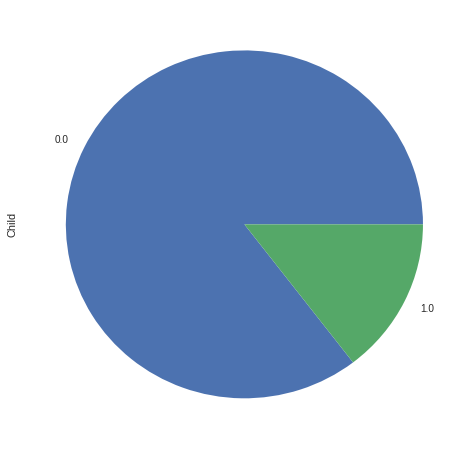

In [0]:
#Question 2

def add_child(df_input,deleteNan):
    
    child = np.zeros(df_input.shape[0])

    i = 0

    for element in df_input['Age']:
        if element < 18 :
            child[i] = 1
            i +=1
        else:
            child[i] = 0
            i +=1

    df_child = pd.DataFrame(child)
    df_child.columns = ['Child']

    df_trainChild = pd.concat([df_input, df_child], axis=1)
    if deleteNan == True:
        df_trainChild = df_trainChild.dropna(subset=['Age'])
    
    return df_trainChild

df_trainChild = add_child(df_train,True)

pourcentageEnfant = pourcentageDf(df_trainChild['Child'])
pourcentageEnfant.plot(kind='pie', subplots=True, figsize=(8, 8))

print("Pourcentage d'adulte : ",pourcentageEnfant[0],"%")
print("Pourcentage d'enfant : ",pourcentageEnfant[1],"%")

df_trainChild.head()

Seulement 12% des voyageurs étaient des enfants.

Pourcentage d'enfant ayant survécu :  42.028985507246375 %
Pourcentage d'enfant décédé :  57.971014492753625 %
Pourcentage d'adulte ayant survécu :  59.65346534653465 %
Pourcentage d'adulte décédé :  40.34653465346535 %


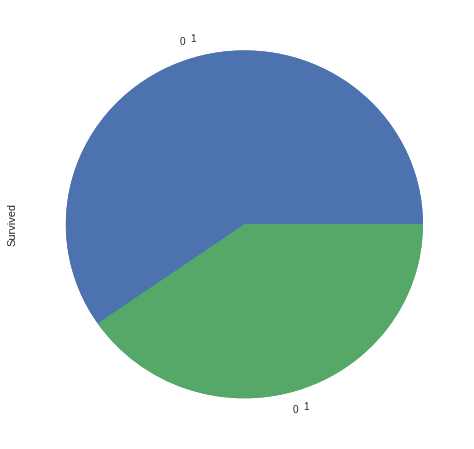

In [0]:
pourcentageEnfantSurvivant = pourcentageDf(df_trainChild[df_trainChild['Child']==1]['Survived'])
pourcentageAdulteSurvivant = pourcentageDf(df_trainChild[df_trainChild['Child']==0]['Survived'])
pourcentageEnfantSurvivant.plot(kind='pie', subplots=True, figsize=(8, 8))
pourcentageAdulteSurvivant.plot(kind='pie', subplots=True, figsize=(8, 8))


print("Pourcentage d'enfant ayant survécu : ",pourcentageEnfantSurvivant[0],"%")
print("Pourcentage d'enfant décédé : ",pourcentageEnfantSurvivant[1],"%")
print("Pourcentage d'adulte ayant survécu : ",pourcentageAdulteSurvivant[0],"%")
print("Pourcentage d'adulte décédé : ",pourcentageAdulteSurvivant[1],"%")

**Question 2 :** Parmis les enfants présents dans le Titanic, une majorité est décedée.  

**Question 3 :** 120 valeurs concernant l'âge du voyageur sont manquantes dans notre jeu de données. Cela peut engendrer un biais très important. Nous allons chercher à savoir s'il existe une corrélation entre l'âge et un autre attribut du dataset pour prédire la valeur manquante.

Simplement enlever les valeurs manquantes ne permettra pas de lutter contre le biais important. 
Nous allons donc utiliser la mtraice de corrélation; outil que nous connaissons pur déterminer les variables fortement corrélés pour essayer de donner de remplir de manière cohérente les valeurs manquantes.


,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.00,0,1,PC 17558,247.5208,B58 B60,C,0.0
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.00,0,0,LINE,0.0000,NaN,S,0.0
7,306,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,1.0
9,308,1,1,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,female,17.00,1,0,PC 17758,108.9000,C65,C,1.0
10,309,0,2,Abelson,Mr. Samuel,male,30.00,1,0,P/PP 3381,24.0000,NaN,C,0.0


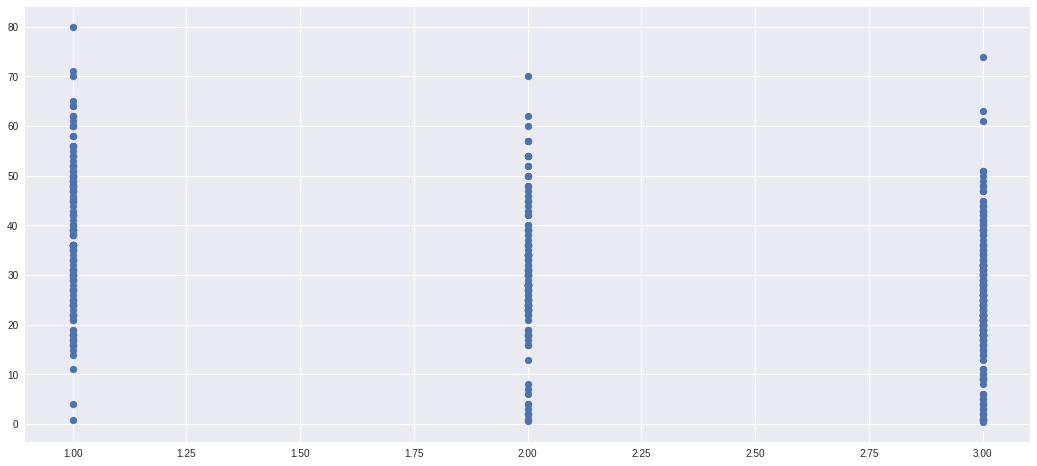

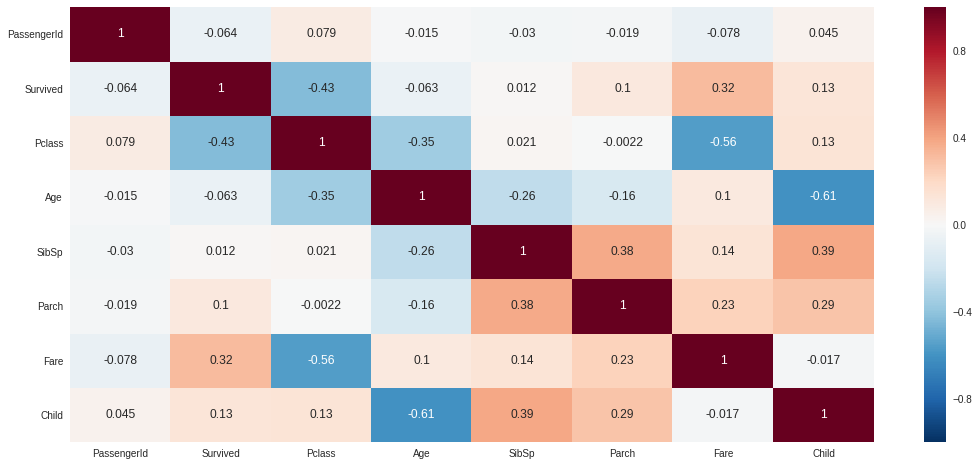

In [0]:



df_trainChildWna = df_trainChild.dropna(subset=['Age'])


fig,ax=plt.subplots(figsize=(18,8))
plt.scatter(df_train['Pclass'], df_train['Age'])

corr_matrix = df_trainChildWna.corr()

fig,ax=plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True)

df_trainChildWna.head()

On peut imaginer une corrélation entre la classe du voyageur et son âge. Même si celle-ci n'est pas extrêmement sûr la valeur du coefficent de détermination entre les élements étant de 0,1225.
Malgré tout on le remarque ci-dessous : la moyenne varie très nettement entre chaque classe, nous sommes sur une hypothèse adapté au dataset, or il semble logique que la classe d'appartenance dépendant du prix du billet  varie en fonciton des âges ( personnes âgés plus riches, jeunes aménés à voyager pour pas chers)Nous allons donc remplacer les valeurs vides par la moyenne d'âge correspondant à la classe du passager.

In [0]:
# La moyenne d'age est différente pour chaque classe

df_adulte = df_train[df_train['Age']>18]
df_enfant = df_train[df_train['Age']<18]


moyenneClass1Adulte = np.mean(df_adulte[df_adulte['Pclass']==1]['Age'])
moyenneClass2Adulte = np.mean(df_adulte[df_adulte['Pclass']==2]['Age'])
moyenneClass3Adulte = np.mean(df_adulte[df_adulte['Pclass']==3]['Age'])

print("Moyenne Classe 1 Adulte: ",moyenneClass1Adulte)
print("Moyenne Classe 2 Adulte: ",moyenneClass2Adulte)
print("Moyenne Classe 3 Adulte: ",moyenneClass3Adulte)


moyenneClass1Enfant = np.mean(df_enfant[df_enfant['Pclass']==1]['Age'])
moyenneClass2Enfant = np.mean(df_enfant[df_enfant['Pclass']==2]['Age'])
moyenneClass3Enfant = np.mean(df_enfant[df_enfant['Pclass']==3]['Age'])

print("Moyenne Classe 1 : ",moyenneClass1Enfant)
print("Moyenne Classe 2 : ",moyenneClass2Enfant)
print("Moyenne Classe 3 : ",moyenneClass3Enfant)


df_trainChild2 = add_child(df_train,False)

df_trainChildNul = pd.DataFrame(df_trainChild['Age'].isnull())
df_trainChild2 = pd.concat([df_trainChild2, df_trainChildNul], axis=1)

df_trainChild2.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'FullName',
                          'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
                          'Embarked', 'Child', 'Bool Age']

j=0

for i in range(0,df_trainChild2.shape[0]):
    
    if df_trainChild2['Bool Age'][i] and df_trainChild2['Pclass'][i] and j%10==0:
        df_trainChild2['Age'][i] = moyenneClass1Enfant
        j+=1
        
    if df_trainChild2['Bool Age'][i] and df_trainChild2['Pclass'][i] and j%10==0:
        df_trainChild2['Age'][i] = moyenneClass1Enfant
        j+=1
        
    if df_trainChild2['Bool Age'][i] and df_trainChild2['Pclass'][i] and j%10==0:
        df_trainChild2['Age'][i] = moyenneClass1Enfant
        j+=1

    if df_trainChild2['Bool Age'][i] and df_trainChild2['Pclass'][i] and j%10!=0:
        df_trainChild2['Age'][i] = moyenneClass1Adulte
        j+=1
        
    if df_trainChild2['Bool Age'][i] and df_trainChild2['Pclass'][i] and j%10!=0:
        df_trainChild2['Age'][i] = moyenneClass2Adulte
        j+=1
        
    if df_trainChild2['Bool Age'][i] and df_trainChild2['Pclass'][i] and j%10!=0:
        df_trainChild2['Age'][i] = moyenneClass3Adulte
        j+=1

df_trainChild2 = df_trainChild2.drop(['Bool Age','Child'],axis=1)
df_trainChild2 = add_child(df_trainChild2,True)

df_trainChild2.head()

Moyenne Classe 1 Adulte:  40.642857142857146
Moyenne Classe 2 Adulte:  34.350515463917525
Moyenne Classe 3 Adulte:  30.321428571428573
Moyenne Classe 1 :  13.083636363636366
Moyenne Classe 2 :  6.7
Moyenne Classe 3 :  8.858604651162791


,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,299,1,1,Saalfeld,Mr. Adolphe,male,30.321429,0,0,19988,30.5000,C106,S,0.0
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.000000,0,1,PC 17558,247.5208,B58 B60,C,0.0
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,30.321429,0,0,9234,7.7500,NaN,Q,0.0
3,302,1,3,McCoy,Mr. Bernard,male,30.321429,2,0,367226,23.2500,NaN,Q,0.0
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.000000,0,0,LINE,0.0000,NaN,S,0.0


In [0]:
pourcentageEnfantSurvivant2 = pourcentageDf(df_trainChild2[df_trainChild2['Child']==1]['Survived'])
pourcentageAdulteSurvivant2 = pourcentageDf(df_trainChild2[df_trainChild2['Child']==0]['Survived'])

print("Pourcentage d'enfant ayant survécu : ",pourcentageEnfantSurvivant2[0],"%")
print("Pourcentage d'enfant décédé : ",pourcentageEnfantSurvivant2[1],"%")
print("Pourcentage d'adulte ayant survécu : ",pourcentageAdulteSurvivant2[0],"%")
print("Pourcentage d'adulte décédé : ",pourcentageAdulteSurvivant2[1],"%")



Pourcentage d'enfant ayant survécu :  42.028985507246375 %
Pourcentage d'enfant décédé :  57.971014492753625 %
Pourcentage d'adulte ayant survécu :  62.59541984732825 %
Pourcentage d'adulte décédé :  37.404580152671755 %


In [0]:
print("Variation du pourcentage d'enfant ayant survécu : ",pourcentageEnfantSurvivant[0] - pourcentageEnfantSurvivant2[0],"%")
print("Variation du pourcentage d'enfant décédé : ",pourcentageEnfantSurvivant[1] - pourcentageEnfantSurvivant2[1],"%")
print("Variation du pourcentage d'adulte ayant survécu : ",pourcentageAdulteSurvivant[0] - pourcentageAdulteSurvivant2[0],"%")
print("Variation du pourcentage d'adulte décédé : ",pourcentageAdulteSurvivant[1] - pourcentageAdulteSurvivant2[1],"%")

Variation du pourcentage d'enfant ayant survécu :  0.0 %
Variation du pourcentage d'enfant décédé :  0.0 %
Variation du pourcentage d'adulte ayant survécu :  -2.9419545007935994 %
Variation du pourcentage d'adulte décédé :  2.9419545007935923 %


On observe aucune modification sur les valeurs concernant les enfants, cela est cohérent avec le fait que notre manière de remplir les données manquantes n'a rajouté aucun enfant  dans notre data set.


On oberve une légère augmentation du nombre d'adulte décédé avec l'utilisation des valeurs précédemment manquantes au sein de notre data-set.

In [0]:
# Question 4

df=df_trainChild2.groupby(['Sex','Child'])
aggregation={
 'Survived': {
 'Survived':'sum',
 'died': lambda x: len(x)-sum(x),
 'Passenger':'count',
 'Survival rate': lambda x: sum(x)/len(x)*100,
 'Death rate' : lambda x : (len(x)-sum(x))/len(x)*100
 }
}
df_agg = df.agg(aggregation)
df_agg

Survived                                        
             Survived died Passenger Survival rate Death rate
Sex    Child                                                 
female 0.0        134   42       176     76.136364  23.863636
       1.0         24    8        32     75.000000  25.000000
male   0.0         62  286       348     17.816092  82.183908
       1.0         16   21        37     43.243243  56.756757

La phrase "les femmes et les enfants d'abord "  prend tout son sens ici quand on voit que seulement 17% des hommes adultes ont survécu à la tragédie contre 75% des femmes et 57% des enfants.

In [0]:
df_testChild = add_child(df_test,True)

df_testChild = df_test.drop(['PassengerId','Name','FullName','Ticket','Cabin'],axis=1)

from sklearn.preprocessing import LabelEncoder

df_testChild = add_child(df_testChild,False)

enc = LabelEncoder()

df_testChild.iloc[:,2:3] = enc.fit_transform(df_testChild.iloc[:,2:3])
df_testChild.iloc[:,6:7] = enc.fit_transform(df_testChild.iloc[:,6:7])
df_testChild.iloc[:,7:8] = enc.fit_transform(df_testChild.iloc[:,7:8].astype(str))
df_testChild.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
0,0,3,1,22.0,1,0,9,2,0.0
1,1,1,0,38.0,1,0,117,0,0.0
2,1,3,0,26.0,0,0,22,2,0.0
3,1,1,0,35.0,1,0,108,2,0.0
4,0,3,1,35.0,0,0,24,2,0.0


In [0]:
df_trainChild = df_trainChild2.drop(['PassengerId','Name','FullName','Ticket','Cabin'],axis=1)

enc = LabelEncoder()

df_trainChild.iloc[:,2:3] = enc.fit_transform(df_trainChild.iloc[:,2:3])
df_trainChild.iloc[:,6:7] = enc.fit_transform(df_trainChild.iloc[:,6:7])
df_trainChild.iloc[:,7:8] = enc.fit_transform(df_trainChild.iloc[:,7:8].astype(str))

df_trainChild.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
0,1,1,1,30.321429,0,0,128,2,0.0
1,1,1,0,50.000000,0,1,203,0,0.0
2,1,3,0,30.321429,0,0,28,1,0.0
3,1,3,1,30.321429,2,0,107,1,0.0
4,0,3,1,19.000000,0,0,0,2,0.0


In [0]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

gnbModel=GaussianNB()
gnbModel.fit(df_trainChild[['Child','Sex']], df_trainChild['Survived'])

GaussianNB(priors=None)

In [0]:
expected =df_trainChild['Survived']
predicted = gnbModel.predict(df_trainChild[['Child','Sex']])



print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.82      0.80      0.81       357
          1       0.71      0.74      0.72       236

avg / total       0.78      0.78      0.78       593



In [0]:
expected =df_testChild['Survived']
predicted = gnbModel.predict(df_testChild[['Child','Sex']])


print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.86      0.77      0.81       192
          1       0.65      0.77      0.70       106

avg / total       0.78      0.77      0.77       298



**Conlusion :** Nous obtenons une précision de 78% sur notre training set et sur notre test set . Le biais et la variance sont correctes. Cependant, il doit etre possible d'améliorer les performances de notre modèle.

In [0]:
print(metrics.confusion_matrix(expected, predicted))

[[147  45]
 [ 24  82]]
